# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  
    
> 다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
- 원하는 인터넷페이지 주소 입력  
- 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
- 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
- url 정보로 requests로 정보 요청
- text 정보를 html로 변환
- html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
> - requests는 요청을 받기는 하지만 text로만 받음  
- API는 통신을 위해 정형화 된 데이터 형태의 text  
- 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
- text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

#### 네이버 메인페이지 크롤링

In [2]:
# 네이버 메인페이지
# url정의

# requsts로 url에 정보요청


# 정보를 html 변환 (보기 쉽게)

# html 내에서 우리가 보고 싶은 정보만 선별


#### 다음 뉴스페이지 크롤링

In [3]:
# 다음 뉴스 페이지 크롤링
# url정의
url='https://naver.com'
# requsts로 url에 정보요청
request = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(request.text,'html.parser')
# html 내에서 뉴스헤더 선별


In [4]:
# request.text

In [5]:
# html.select('img')

### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">비비고 왕교자</span>

>> 단일 셀렉터  
html.select('span')  # 태그 이름이 span인 친구들을 다 들고옴  
tag : span  
class(별명, 그룹명) : .news

>> 클래스 포함 셀렉터
html.select('span.news')

>> id 포함 셀렉터
id(고유값) : #1234
html.select('span#1234')

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [6]:
import time

In [8]:
# 슬의생 드라마소개 크롤링
k = input('드라마 제목을 입력하세요')
# requsts로 url에 정보요청
url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={k}'
# 정보를 html 변환 (보기 쉽게)
resp = requests.get(url)
html = BeautifulSoup(resp.text,'html.parser')
# html 내에서 우리가 보고 싶은 정보만 선별

드라마 제목을 입력하세요사이코지만 괜찮아


In [9]:

html.select('span.desc') # <- list 타입으로 html을 담아온다

[<span class="desc _text">버거운 삶의 무게로 사랑을 거부하는 정신 병동 보호사 강태와 태생적 결함으로 사랑을 모르는 동화 작가 문영이 서로의 상처를 보듬고 치유해가는 한 편의 판타지 동화 같은 사랑에 관한 조금 이상한 로맨틱 코미디</span>,
 <span class="desc">2022.01.02.</span>,
 <span class="desc">2021.04.13.</span>,
 <span class="desc">2020.11.18.</span>]

In [10]:
html.select('span.desc')[0].text

'버거운 삶의 무게로 사랑을 거부하는 정신 병동 보호사 강태와 태생적 결함으로 사랑을 모르는 동화 작가 문영이 서로의 상처를 보듬고 치유해가는 한 편의 판타지 동화 같은 사랑에 관한 조금 이상한 로맨틱 코미디'

In [11]:
# 해당 드라마 블로그 헤더 텍스트 크롤링
# 슬의생 드라마소개 크롤링
# requsts로 url에 정보요청
k = input('드라마 제목을 입력하세요')
url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={k}'
# 정보를 html 변환 (보기 쉽게)
resp = requests.get(url)
html = BeautifulSoup(resp.text,'html.parser')
# html 내에서 우리가 보고 싶은 정보만 선별

드라마 제목을 입력하세요


In [12]:
html.select('a.total_tit')

[]

In [13]:
for i in html.select('a.total_tit'):
    print(i.text)

## 다음에서 로또번호 가져오기

In [14]:
#div.lottonum

In [15]:
# url 설정
url = 'https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90%EB%B2%88%ED%98%B8'
# requests로 데이터 요청하기
resp = requests.get(url)
# html로 변환
html=BeautifulSoup(resp.text,'html.parser')
# 데이터 선별


In [16]:
html.select('span.ball')[3]

<span class="ball bg_ball2">16</span>

In [17]:

for i in html.select('span.ball')[:6]:
    print(i.text)

4
7
14
16
24
44


In [18]:
lotto =[i.text for i in html.select('span.ball')[:6]]
lotto

['4', '7', '14', '16', '24', '44']

In [19]:
html.select('div.lottonum')[0].text

' 4 7 14 16 24 44 보너스 20 '

In [20]:
for i in html.select('div.lottonum'):
    print(i.text)

 4 7 14 16 24 44 보너스 20 


## 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [21]:
#num = [a for a in range(900,998)]
num=[a for a in range(900,938)]

In [22]:
# url 설정
url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={num}'
# requests로 데이터 요청하기

# html로 변환

# 데이터 선별


In [23]:
import time

In [118]:
lotto2=[]
for i in num:
    time.sleep(2)
    print(f'{i}회차 크롤링 중이라구욧')
    url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={i}회차%20로또'
    resp = requests.get(url)
    html=BeautifulSoup(resp.text,'html.parser')
    lotto =[i.text for i in html.select('span.ball')[:6]]
    lotto2.append(lotto)
print('크롤링 끝~')


900회차 크롤링 중이라구욧
901회차 크롤링 중이라구욧
902회차 크롤링 중이라구욧
903회차 크롤링 중이라구욧
904회차 크롤링 중이라구욧
905회차 크롤링 중이라구욧
906회차 크롤링 중이라구욧
907회차 크롤링 중이라구욧
908회차 크롤링 중이라구욧
909회차 크롤링 중이라구욧
910회차 크롤링 중이라구욧
911회차 크롤링 중이라구욧
912회차 크롤링 중이라구욧
913회차 크롤링 중이라구욧
914회차 크롤링 중이라구욧
915회차 크롤링 중이라구욧
916회차 크롤링 중이라구욧
917회차 크롤링 중이라구욧
918회차 크롤링 중이라구욧
919회차 크롤링 중이라구욧
920회차 크롤링 중이라구욧
921회차 크롤링 중이라구욧
922회차 크롤링 중이라구욧
923회차 크롤링 중이라구욧
924회차 크롤링 중이라구욧
925회차 크롤링 중이라구욧
926회차 크롤링 중이라구욧
927회차 크롤링 중이라구욧
928회차 크롤링 중이라구욧
929회차 크롤링 중이라구욧
930회차 크롤링 중이라구욧
931회차 크롤링 중이라구욧
932회차 크롤링 중이라구욧
933회차 크롤링 중이라구욧
934회차 크롤링 중이라구욧
935회차 크롤링 중이라구욧
936회차 크롤링 중이라구욧
937회차 크롤링 중이라구욧
크롤링 끝~


In [119]:
lotto2

[['7', '13', '16', '18', '35', '38'],
 ['5', '18', '20', '23', '30', '34'],
 ['7', '19', '23', '24', '36', '39'],
 ['2', '15', '16', '21', '22', '28'],
 ['2', '6', '8', '26', '43', '45'],
 ['3', '4', '16', '27', '38', '40'],
 ['2', '5', '14', '28', '31', '32'],
 ['21', '27', '29', '38', '40', '44'],
 ['3', '16', '21', '22', '23', '44'],
 ['7', '24', '29', '30', '34', '35'],
 ['1', '11', '17', '27', '35', '39'],
 ['4', '5', '12', '14', '32', '42'],
 ['5', '8', '18', '21', '22', '38'],
 ['6', '14', '16', '21', '27', '37'],
 ['16', '19', '24', '33', '42', '44'],
 ['2', '6', '11', '13', '22', '37'],
 ['6', '21', '22', '32', '35', '36'],
 ['1', '3', '23', '24', '27', '43'],
 ['7', '11', '12', '31', '33', '38'],
 ['9', '14', '17', '18', '42', '44'],
 ['2', '3', '26', '33', '34', '43'],
 ['5', '7', '12', '22', '28', '41'],
 ['2', '6', '13', '17', '27', '43'],
 ['3', '17', '18', '23', '36', '41'],
 ['3', '11', '34', '42', '43', '44'],
 ['13', '24', '32', '34', '39', '42'],
 ['10', '16', '18', 

In [120]:
# 데이터 시각화까지
lotto_array = np.array(lotto2).reshape(-1)

In [121]:
lotto_array

array(['7', '13', '16', '18', '35', '38', '5', '18', '20', '23', '30',
       '34', '7', '19', '23', '24', '36', '39', '2', '15', '16', '21',
       '22', '28', '2', '6', '8', '26', '43', '45', '3', '4', '16', '27',
       '38', '40', '2', '5', '14', '28', '31', '32', '21', '27', '29',
       '38', '40', '44', '3', '16', '21', '22', '23', '44', '7', '24',
       '29', '30', '34', '35', '1', '11', '17', '27', '35', '39', '4',
       '5', '12', '14', '32', '42', '5', '8', '18', '21', '22', '38', '6',
       '14', '16', '21', '27', '37', '16', '19', '24', '33', '42', '44',
       '2', '6', '11', '13', '22', '37', '6', '21', '22', '32', '35',
       '36', '1', '3', '23', '24', '27', '43', '7', '11', '12', '31',
       '33', '38', '9', '14', '17', '18', '42', '44', '2', '3', '26',
       '33', '34', '43', '5', '7', '12', '22', '28', '41', '2', '6', '13',
       '17', '27', '43', '3', '17', '18', '23', '36', '41', '3', '11',
       '34', '42', '43', '44', '13', '24', '32', '34', '39', '42', 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


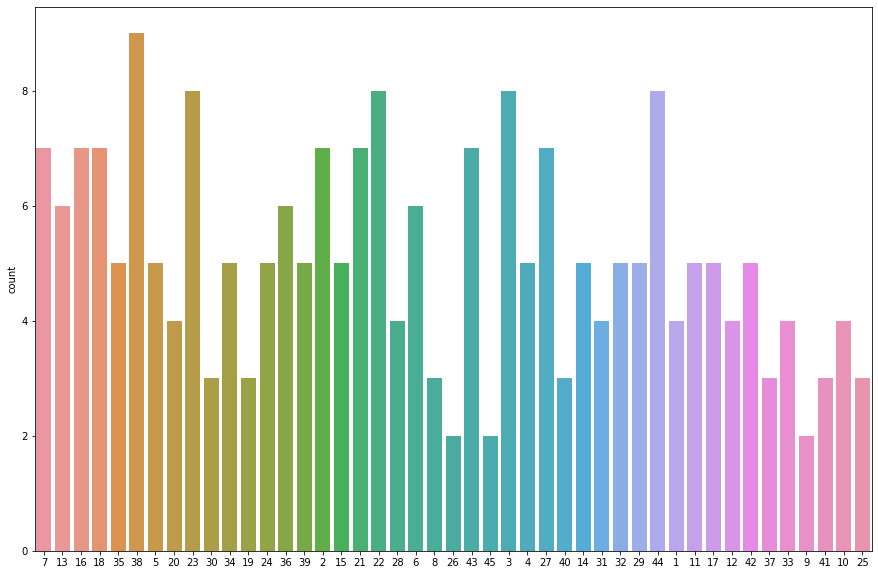

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(lotto_array)
plt.show()

In [124]:
resp

<Response [200]>

In [50]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [126]:
# 차단막는 코드
for i in range(4):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print('실험중')

실험중
실험중
실험중
실험중


In [ ]:
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)
time.sleep(a)

## **네이버 키워드로 검색한 결과를 크롤링(속성 접근)**

In [24]:

keyword = input('내용을 입력하세요 : ')

url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={keyword}'

resp = requests.get(url)
html = BeautifulSoup(resp.text,'html.parser')
for i in html.select('a.total_tit'):
    print(i.text, i.attrs['href'])

내용을 입력하세요 : 이지스 건담
[MG] 이지스 건담-3 https://blog.naver.com/chgood123/222524063965
반다이 기동전사 건담 Seed Advanced MS in Action 08 GAT-X303 이지스 건담 피규어 https://blog.naver.com/surplus2050/222611957585
MG 1/100 기동전사 건담 SEED - 이지스 건담 디액티브 모드 ver 도색 리뷰! https://blog.naver.com/godknowsyou/222396465847
[FW 건담 컨버지] #21탄 249 이지스 건담 https://blog.naver.com/pgonta/222472106961
PS4 뉴 건담 브레이커 티저 영상 공개 https://post.naver.com/viewer/postView.nhn?volumeNo=12230985&memberNo=1966129&vType=VERTICAL
컨버지 249 이지스 건담 리뷰 및 MA 모드 마개조 https://cafe.naver.com/gcd/1036639
[SDW 히어로즈 외전] 워록 이지스 건담 [2022/3분기][미정] https://blog.naver.com/besson13h/222583279379
시리즈 MS 전원 기동! 모바일게임 ‘건담 슈프림 배틀’ 양대 마켓 출시 https://post.naver.com/viewer/postView.nhn?volumeNo=31773434&memberNo=6258463&vType=VERTICAL


    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

#### 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기

In [25]:
# url 정의
code = '005930'
url = f'https://finance.naver.com/item/main.naver?code={code}'
# requests 요청
resp = requests.get(url)

# html 변환 외국인소진률 
html = BeautifulSoup(resp.text,'html.parser')
print('시가 총액 : ',html.select('em#_market_sum')[0].text.replace('\t','').strip().replace('\n',''))
print('외국인 소진률 : ',html.select('table.lwidth td em')[2].text)
print('PER : ',html.select('em#_per')[0].text)
print('PBR : ',html.select('em#_eps')[0].text)
# 시가총액, 외국인 소진률, PER, PBR


시가 총액 :  471조158
외국인 소진률 :  52.15%
PER :  15.29
PBR :  5,159


In [26]:
html.select('em#_market_sum')[0].text.replace('\t','').strip().replace('\n','')

'471조158'

In [27]:
print('PER : ', html.select('em#_per'))
print('EPS : ', html.select('em#_eps'))


PER :  [<em id="_per">15.29</em>]
EPS :  [<em id="_eps">5,159</em>]


In [28]:
url ='https://finance.naver.com/item/main.naver?code=149980'
resp = requests.get(url)
html = BeautifulSoup(resp.text,'html.parser')
print('시가 총액 : ',html.select('em#_market_sum')[0].text.replace('\t','').strip().replace('\n',''))
print('외국인 소진률 : ',html.select('table.lwidth td em')[2].text)
print('PER : ',html.select('em#_per')[0].text)
print('PBR : ',html.select('em#_eps')[0].text)

시가 총액 :  1,049
외국인 소진률 :  1.09%
PER :  19.13
PBR :  389


In [29]:
html.select('em#_market_sum')[0].text.strip()

'1,049'

#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [30]:
# 종목리스트 정의

# url 정의

# requests 요청

# html 변환

# 데이터 선별


In [31]:
# 데이터프레임 제작


## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [32]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
# requests 요청시에 헤더정보 추가
url='https://finance.naver.com/item/sise_day.naver?code=149980&page=2'

info ={'referer' : 'https://finance.naver.com/item/sise_day.naver?code=149980',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
      }

resp = requests.get(url,headers=info)

In [33]:
resp

<Response [200]>

In [34]:
html =BeautifulSoup(resp.text,'html.parser')

In [35]:
#tah p10 gray03
data = [item.text.strip() for item in html.select('span.tah')]
data

['2021.12.27',
 '8,070',
 '0',
 '8,010',
 '8,220',
 '7,870',
 '662,204',
 '2021.12.24',
 '8,070',
 '470',
 '8,610',
 '8,880',
 '8,010',
 '1,598,697',
 '2021.12.23',
 '8,540',
 '160',
 '8,700',
 '8,760',
 '8,520',
 '1,272,643',
 '2021.12.22',
 '8,700',
 '1,350',
 '7,390',
 '9,350',
 '7,310',
 '9,952,575',
 '2021.12.21',
 '7,350',
 '60',
 '7,300',
 '8,140',
 '7,150',
 '1,986,840',
 '2021.12.20',
 '7,290',
 '220',
 '7,070',
 '7,340',
 '6,900',
 '224,526',
 '2021.12.17',
 '7,070',
 '120',
 '7,220',
 '7,220',
 '6,970',
 '168,447',
 '2021.12.16',
 '7,190',
 '10',
 '7,180',
 '7,330',
 '7,140',
 '161,087',
 '2021.12.15',
 '7,180',
 '110',
 '7,290',
 '7,640',
 '7,160',
 '389,178',
 '2021.12.14',
 '7,290',
 '210',
 '7,340',
 '7,420',
 '7,200',
 '242,689']

In [36]:
data_array = np.array(data)
data_array

array(['2021.12.27', '8,070', '0', '8,010', '8,220', '7,870', '662,204',
       '2021.12.24', '8,070', '470', '8,610', '8,880', '8,010',
       '1,598,697', '2021.12.23', '8,540', '160', '8,700', '8,760',
       '8,520', '1,272,643', '2021.12.22', '8,700', '1,350', '7,390',
       '9,350', '7,310', '9,952,575', '2021.12.21', '7,350', '60',
       '7,300', '8,140', '7,150', '1,986,840', '2021.12.20', '7,290',
       '220', '7,070', '7,340', '6,900', '224,526', '2021.12.17', '7,070',
       '120', '7,220', '7,220', '6,970', '168,447', '2021.12.16', '7,190',
       '10', '7,180', '7,330', '7,140', '161,087', '2021.12.15', '7,180',
       '110', '7,290', '7,640', '7,160', '389,178', '2021.12.14', '7,290',
       '210', '7,340', '7,420', '7,200', '242,689'], dtype='<U10')

In [37]:
data_array =data_array.reshape(-1,7)

In [38]:
data_array

array([['2021.12.27', '8,070', '0', '8,010', '8,220', '7,870', '662,204'],
       ['2021.12.24', '8,070', '470', '8,610', '8,880', '8,010',
        '1,598,697'],
       ['2021.12.23', '8,540', '160', '8,700', '8,760', '8,520',
        '1,272,643'],
       ['2021.12.22', '8,700', '1,350', '7,390', '9,350', '7,310',
        '9,952,575'],
       ['2021.12.21', '7,350', '60', '7,300', '8,140', '7,150',
        '1,986,840'],
       ['2021.12.20', '7,290', '220', '7,070', '7,340', '6,900',
        '224,526'],
       ['2021.12.17', '7,070', '120', '7,220', '7,220', '6,970',
        '168,447'],
       ['2021.12.16', '7,190', '10', '7,180', '7,330', '7,140',
        '161,087'],
       ['2021.12.15', '7,180', '110', '7,290', '7,640', '7,160',
        '389,178'],
       ['2021.12.14', '7,290', '210', '7,340', '7,420', '7,200',
        '242,689']], dtype='<U10')

In [39]:
columns_name =[i.text for i in html.select('th')]
columns_name

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']

In [40]:
#데이터 프레임 제작
df= pd.DataFrame(data_array, columns = columns_name )
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2021.12.27,"8,070",0,"8,010","8,220","7,870","662,204"
1,2021.12.24,"8,070",470,"8,610","8,880","8,010","1,598,697"
2,2021.12.23,"8,540",160,"8,700","8,760","8,520","1,272,643"
3,2021.12.22,"8,700","1,350","7,390","9,350","7,310","9,952,575"
4,2021.12.21,"7,350",60,"7,300","8,140","7,150","1,986,840"
5,2021.12.20,"7,290",220,"7,070","7,340","6,900","224,526"
6,2021.12.17,"7,070",120,"7,220","7,220","6,970","168,447"
7,2021.12.16,"7,190",10,"7,180","7,330","7,140","161,087"
8,2021.12.15,"7,180",110,"7,290","7,640","7,160","389,178"
9,2021.12.14,"7,290",210,"7,340","7,420","7,200","242,689"


In [41]:
url = 'https://finance.daum.net/api/quote/A035720/days?symbolCode=A035720&page=1&perPage=10&pagination=true'
info = {'referer': 'https://finance.daum.net/quotes/A035720',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
       }

resp = requests.get(url,params = info)
#resp = requests.get(url,headers = info)
#div.box_contents
#data = [item.text.strip() for item in html.select('div.box_contents')]
#data_array = np.array(data)
#data_array =data_array.reshape(-1,7)

In [47]:
resp

<Response [403]>

In [42]:
import json

In [46]:
data = json.load(resp)
data

AttributeError: 'Response' object has no attribute 'read'

In [45]:
pd.DataFrame(data)

,0
0,2021.12.27
1,"8,070"
2,0
3,"8,010"
4,"8,220"
...,...
65,210
66,"7,340"
67,"7,420"
68,"7,200"


In [90]:
# 콤마 제거

# 함수 적용

# 타입 변환

# 종가 그래프


### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [100]:
# 헤더정보 정의
total_df = pd.DataFrame()
# 인덱스 정의
for i in range(i):
    url=f'{i}page'


# 전체 가격 데이터

# requests 요청시에 헤더정보 추가
    
# html 변환
    temp_df = pd.DataFrame(data['key'])
# 날짜 인덱스 살려서 활용하기
    total_df = pd.concat([total_df,temp_df])
# 가격정보 추출

# 데이터프레임 제작


1페이지 크롤링 중
2페이지 크롤링 중
3페이지 크롤링 중
4페이지 크롤링 중
5페이지 크롤링 중
6페이지 크롤링 중
7페이지 크롤링 중
8페이지 크롤링 중
9페이지 크롤링 중
10페이지 크롤링 중
11페이지 크롤링 중
12페이지 크롤링 중
13페이지 크롤링 중
14페이지 크롤링 중
15페이지 크롤링 중
16페이지 크롤링 중
17페이지 크롤링 중
18페이지 크롤링 중
19페이지 크롤링 중
20페이지 크롤링 중


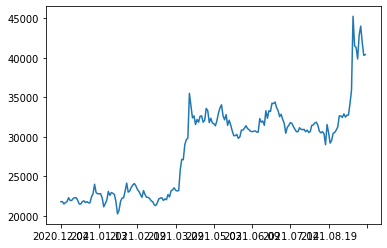

### 종목도 여러개 순환시키고 각 개별종목 데이터 csv 저장하는 연습

### 네이버 데이터랩 인기검색어 크롤링

In [265]:
url ='https://datalab.naver.com/shoppingInsight/getCategoryRank.naver?timeUnit=date&cid=50000000'
info ={'referer': 'https://datalab.naver.com/home/sectionSearch.naver',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
    
}
resp = requests.post(url,headers=info)

In [280]:
resp.text # <- 이렇게 먼저 확인해보고 json인지 html인지 선택하자

'[{"message":null,"statusCode":200,"returnCode":0,"date":"2021/12/30","datetime":"2021.12.30.(목)","range":"","ranks":[{"rank":1,"keyword":"점퍼","linkId":"50000814"},{"rank":2,"keyword":"점퍼","linkId":"50000837"},{"rank":3,"keyword":"코트","linkId":"50000813"},{"rank":4,"keyword":"티셔츠","linkId":"50000830"},{"rank":5,"keyword":"원피스","linkId":"50000807"},{"rank":6,"keyword":"니트/스웨터","linkId":"50000805"},{"rank":7,"keyword":"바지","linkId":"50000810"},{"rank":8,"keyword":"재킷","linkId":"50000815"},{"rank":9,"keyword":"티셔츠","linkId":"50000803"},{"rank":10,"keyword":"바지","linkId":"50000836"}]},{"message":null,"statusCode":200,"returnCode":0,"date":"2021/12/31","datetime":"2021.12.31.(금)","range":"","ranks":[{"rank":1,"keyword":"점퍼","linkId":"50000814"},{"rank":2,"keyword":"점퍼","linkId":"50000837"},{"rank":3,"keyword":"코트","linkId":"50000813"},{"rank":4,"keyword":"티셔츠","linkId":"50000830"},{"rank":5,"keyword":"원피스","linkId":"50000807"},{"rank":6,"keyword":"니트/스웨터","linkId":"50000805"},{"rank":7,"key

In [286]:
data = json.loads(resp.text)
data

[{'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2021/12/30',
  'datetime': '2021.12.30.(목)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '점퍼', 'linkId': '50000814'},
   {'rank': 2, 'keyword': '점퍼', 'linkId': '50000837'},
   {'rank': 3, 'keyword': '코트', 'linkId': '50000813'},
   {'rank': 4, 'keyword': '티셔츠', 'linkId': '50000830'},
   {'rank': 5, 'keyword': '원피스', 'linkId': '50000807'},
   {'rank': 6, 'keyword': '니트/스웨터', 'linkId': '50000805'},
   {'rank': 7, 'keyword': '바지', 'linkId': '50000810'},
   {'rank': 8, 'keyword': '재킷', 'linkId': '50000815'},
   {'rank': 9, 'keyword': '티셔츠', 'linkId': '50000803'},
   {'rank': 10, 'keyword': '바지', 'linkId': '50000836'}]},
 {'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2021/12/31',
  'datetime': '2021.12.31.(금)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '점퍼', 'linkId': '50000814'},
   {'rank': 2, 'keyword': '점퍼', 'linkId': '50000837'},
   {'rank': 3, 'keyword': '코트', 'linkId': '50000813'

In [293]:
df = pd.DataFrame(data[0]['ranks'])
df

,rank,keyword,linkId
0,1,점퍼,50000814
1,2,점퍼,50000837
2,3,코트,50000813
3,4,티셔츠,50000830
4,5,원피스,50000807
5,6,니트/스웨터,50000805
6,7,바지,50000810
7,8,재킷,50000815
8,9,티셔츠,50000803
9,10,바지,50000836


### 다음 주식 일자별 주가 데이터 크롤링 연습

## 파파고 API

In [143]:
papago()

번역이 필요한 한국어를 입력하세요 : 강의시작하겠습니다 카메라를 켜주시고 참석바랍니다.
Let's begin the lecture. Please turn on the camera and attend.


## 공공데이터 API

서울특별시 중구 퇴계로36길 10(필동2가 80-2)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 퇴계로34길 28(필동2가 84-1)
서울특별시 중구 소월로 91(남대문로5가 471)
서울특별시 중구 장충동2가 산14-21
서울특별시 중구 남산공원길 125-72(예장동 산5-6)
서울특별시 중구 예장동 8-1
서울특별시 중구 예장동 8-1
서울특별시 중구 필동로1길 30(장충동2가 192-5)
서울특별시 중구 장충단로 72(장충동2가 201-6)
